In [2]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("test5.csv")
df = pd.DataFrame(df)
#df2.head()
#df1.head()

In [10]:
#нормализация
df["Class"] -= 1
for k in df.keys():
    if (k != "Class"):
        df[k] = (df[k] - df[k].mean()) / (df[k].std())
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,Class
0,-1.001884,0.615620,-1.018523,0.406325,0.612902,0.117954,-0.264374,1.330491,-0.382566,-0.644974,-0.738037,-0.110704,-0.321811,0
1,0.150217,-1.618853,0.017621,1.435260,-0.529484,0.117954,-0.264374,0.692637,-0.382566,0.455562,1.368593,-0.110704,-0.321811,1
2,-1.385918,0.615620,-1.018523,-0.108143,0.550018,0.117954,1.148823,-1.619587,-0.382566,-0.644974,-0.738037,-0.110704,-0.321811,0
3,0.022206,-1.618853,1.053766,0.303431,-0.173144,0.117954,-0.264374,-1.220928,1.023364,1.005830,1.368593,-0.110704,-0.321811,3
4,0.790274,0.615620,0.017621,0.920792,-2.510319,0.117954,-0.264374,-0.662805,-0.382566,-0.644974,-0.738037,-0.110704,-0.321811,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.022206,-1.618853,-1.018523,-7.259245,0.812033,0.117954,1.148823,-5.885241,-13.035941,1.556098,1.177081,-0.110704,-0.321811,0
290,-1.513929,0.615620,-1.018523,-0.622611,-0.676213,0.117954,-0.264374,1.649419,-0.382566,-0.644974,-0.738037,-0.110704,-0.321811,0
291,0.022206,0.615620,0.017621,-1.137079,-0.204586,0.117954,-0.264374,-0.024950,-0.382566,-0.644974,-0.738037,-0.110704,3.139620,0
292,-0.105805,-1.618853,-1.018523,0.406325,0.277522,0.117954,-0.264374,-0.144548,-0.382566,0.455562,1.177081,-0.110704,-0.321811,0


In [11]:
from math import sqrt, pi, e, cos
def subtract(str1, str2):
    return np.abs(str2 - str1)
 
def dist(str1, str2):
    global type_func
    sub = subtract(str1, str2)
    return sqrt(sum(sub * sub))
 
def kernel_func(elem):
    if (abs(elem) >= 1):
        return 0
    return 15 / 16 * ((1 - elem * elem) ** 2)

In [12]:
def task3(index, dat):
    dat = dat.drop("Class", axis = 1)
    obj = dat.iloc[index]
    data = dat.drop(index, axis = 0)
    n = data.shape[0]
    m = data.shape[1] - 1
    
    global type_func, type_kernel, type_window, classes, h
    
    kernel_arg = [0] * n
    distance = [0] * n
    for i in range(n):
        distance[i] = dist(data.iloc[i], obj)
    distance.sort()
    for i in range(n):
        kernel_arg[i] = dist(data.iloc[i], obj) / distance[h]
    w = [0] * n
    for i in range(n):
        w[i] = kernel_func(kernel_arg[i])
    divisor = 0
    divirsity = 0
    for i in range(n):
        divisor += w[i] * classes.iloc[i]
        divirsity += w[i]
    if (divirsity == 0):
        sum_of_metki = 0
        amount_of_metki = 0
        sum_all = 0
        for i in range(n):
            x = 1
            sum_all += classes.iloc[i]
            for j in range(m):
                if (data.iloc[i, j] != obj[j]):
                    x = 0
            if (x == 1):
                sum_of_metki += classes.iloc[i]
                amount_of_metki += 1
        if (amount_of_metki > 0):
            return (sum_of_metki / amount_of_metki)
        else:
            return (sum_all / n)
    return divisor / divirsity
    

In [13]:
from tqdm import tqdm
classes = df["Class"]
classes

0      0
1      1
2      0
3      3
4      0
      ..
289    0
290    0
291    0
292    0
293    0
Name: Class, Length: 294, dtype: int64

In [14]:

lst = []
#t_func = ["manhattan", "euclidean", "chebyshev"]
#t_kernel = ["uniform", "triangular", "epanechnikov", "quartic", "triweight", "tricube", "gaussian", "cosine", "logistic", "sigmoid"]
#t_window = ["fixed", "unfixed"]
t_func = ["euclidean"]
t_kernel = ["quartic"]
t_window = ["unfixed"]
answer1 = []
answer2 = []
sz = len(classes.unique())
for h in range(2, 3):
    lst.clear()
    for type_func in t_func:
        for type_kernel in t_kernel:
            for type_window in t_window:
                for i in tqdm(range(df.shape[0])):
                    lst.append([task3(i, df), i])
                    lst[i][0] = int(round(lst[i][0]))
    lst.sort(reverse=True)
    mas = [0] * sz
    t = [0] * sz
    c = [0] * sz
    p = [0] * sz
    fp = [0] * sz
    fn = [0] * sz
    for i in range(sz):
        mas[i] = [0] * sz
    for i in lst:
        mas[classes[i[1]]][i[0]] += 1
    print(mas)
    for i in range(sz):
        t[i] = mas[i][i]
        c[i] = sum(mas[i])
        fn[i] = c[i] - t[i]
    for i in range(sz):
        for j in range(sz):
            p[j] += mas[i][j]
    for i in range(sz):
        fp[i] = p[i] - t[i]
    precw = 0
    for i in range(sz):
        if (p[i] != 0):
            precw += t[i] * c[i] / p[i]
    precw /= sum(c)

    prec = [0] * sz
    recall = [0] * sz
    for i in range(sz):
        if (t[i] + fn[i] != 0):
            recall[i] = t[i] / (t[i] + fn[i])
        if (t[i] + fp[i] != 0):
            prec[i] = t[i] / (t[i] + fp[i])

    recallw = 0
    for i in range(sz):
        recallw += t[i]
    recallw /= sum(c)
    macro = 0
    if (precw + recallw != 0):
        macro = 2 * precw * recallw / (precw + recallw)
    answer1.append(macro)
    
    micro = 0
    for i in range(sz):
        if (prec[i] + recall[i] != 0):
            micro += c[i] * 2 * (prec[i] * recall[i]) / (prec[i] + recall[i])
    micro /= sum(c)
    answer2.append(micro)
    print(macro, micro)

100%|████████████████████████████████████████████████████████████████████████████████| 294/294 [01:42<00:00,  2.87it/s]

[[137, 27, 9, 11, 4], [19, 6, 6, 3, 3], [9, 3, 9, 5, 0], [8, 10, 4, 6, 0], [4, 1, 3, 7, 0]]
0.5458451020043394 0.5449830194720796


[0.5458451020043394] [0.5449830194720796]


ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

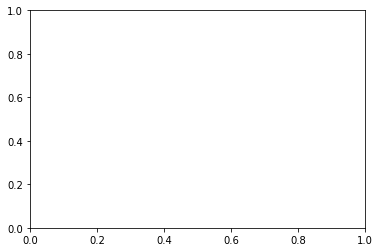

In [15]:
import matplotlib.pyplot as plt
print(answer1, answer2)
plt.plot(range(9), answer1, answer2)
plt.show()

In [ ]:
def one_hot(i, maxsz):
    ans = np.zeros(maxsz)
    ans[i] = 1
    return ans

In [ ]:
one_hot_df = df.copy()
one_hot_df["Class"] = classes
one_hot_df["Class"] = one_hot_df["Class"].apply(lambda x : one_hot(x, len(classes.unique())))

In [ ]:
from tqdm import tqdm
one_hot_classes = one_hot_df["Class"]
lst = []
#t_func = ["manhattan", "euclidean", "chebyshev"]
#t_kernel = ["uniform", "triangular", "epanechnikov", "quartic", "triweight", "tricube", "gaussian", "cosine", "logistic", "sigmoid"]
#t_window = ["fixed", "unfixed"]
t_func = ["euclidean"]
t_kernel = ["quartic"]
t_window = ["unfixed"]
answer3 = []
answer4 = []
for h in range(1, 10):
    lst.clear()
    for type_func in t_func:
        for type_kernel in t_kernel:
            for type_window in t_window:
                for i in tqdm(range(df.shape[0])):
                    lst.append([task3(i, one_hot_df), i])
                    print(lst)
                    lst[i][0] = np.argmax(lst[i][0])
    lst.sort(reverse=True)
    mas = [0] * sz
    t = [0] * sz
    c = [0] * sz
    p = [0] * sz
    fp = [0] * sz
    fn = [0] * sz
    for i in range(sz):
        mas[i] = [0] * sz
    for i in lst:
        mas[classes[i[1]]][i[0]] += 1
    for i in range(sz):
        t[i] = mas[i][i]
        c[i] = sum(mas[i])
        fn[i] = c[i] - t[i]
    for i in range(sz):
        for j in range(sz):
            p[j] += mas[i][j]
    for i in range(sz):
        fp[i] = p[i] - t[i]
    precw = 0
    for i in range(sz):
        if (p[i] != 0):
            precw += t[i] * c[i] / p[i]
    precw /= sum(c)

    prec = [0] * sz
    recall = [0] * sz
    for i in range(sz):
        if (t[i] + fn[i] != 0):
            recall[i] = t[i] / (t[i] + fn[i])
        if (t[i] + fp[i] != 0):
            prec[i] = t[i] / (t[i] + fp[i])

    recallw = 0
    for i in range(sz):
        recallw += t[i]
    recallw /= sum(c)
    macro = 0
    if (precw + recallw != 0):
        macro = 2 * precw * recallw / (precw + recallw)
    answer3.append(macro)
    
    micro = 0
    for i in range(sz):
        if (prec[i] + recall[i] != 0):
            micro += c[i] * 2 * (prec[i] * recall[i]) / (prec[i] + recall[i])
    micro /= sum(c)
    answer4.append(micro)

In [ ]:
import matplotlib.pyplot as plt
palette = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.plot(range(9), answer1, color=palette[1], label="macro_naive")
plt.plot(range(9), answer2, color=palette[2], label="micro_naive")
plt.plot(range(9), answer3, color=palette[3], label="macro_one_hot")
plt.plot(range(9), answer4, color=palette[4], label="micro_one_hot")
plt.legend(loc=2, ncol=2)
plt.show()